In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import sys
sys.path.append('/home/ajc348/rds/hpc-work/mopo')

In [12]:
import os

import numpy as np
import matplotlib.pyplot as plt

from dogo.results import get_scores_df

In [13]:
plt.rc('font', size=18)
cols = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
lss =  ['-', '--']

In [14]:
evaluation_datasets_lables = [
    ("W-D3RLPY-RT-0.1M-1-P0_10000", "D3RLPY: 0.1M"),
    ("W-D3RLPY-RT-0.2M-1-P0_10000", "D3RLPY: 0.2M"),
    ("W-D3RLPY-RT-0.5M-1-P0_10000", "D3RLPY: 0.5M"),
    ("W-D3RLPY-RT-1M-1-P0_10000", "D3RLPY: 1M"),
    ("W-D3RLPY-RT-2M-1-P0_10000", "D3RLPY: 2M"),
    ("W-D3RLPY-RT-0.1M-2-P0_10000", "D3RLPY 2 - 0.1M"),
    ("W-D3RLPY-RT-0.2M-2-P0_10000", "D3RLPY 2 - 0.2M"),
    ("W-D3RLPY-RT-0.5M-2-P0_10000", "D3RLPY 2 - 0.5M"),
    ("W-D3RLPY-RT-1M-2-P0_10000", "D3RLPY 2 - 1M"),
    ("W-D3RLPY-RT-2M-2-P0_10000", "D3RLPY 2 - 2M"),
    ("W-D3RLPY-RT-0.1M-3-P0_10000", "D3RLPY 3 - 0.1M"),
    ("W-D3RLPY-RT-0.2M-3-P0_10000", "D3RLPY 3 - 0.2M"),
    ("W-D3RLPY-RT-0.5M-3-P0_10000", "D3RLPY 3 - 0.5M"),
    ("W-D3RLPY-RT-1M-3-P0_10000", "D3RLPY 3 - 1M"),
    ("W-D3RLPY-RT-2M-3-P0_10000", "D3RLPY 3 - 2M"),
    ("W-SAC-RT-0.1M-1-P0_10000", "SL: 0.1M"),
    ("W-SAC-RT-0.25M-1-P0_10000", "SL: 0.25M"),
    ("W-SAC-RT-0.5M-1-P0_10000", "SL: 0.5M"),
    ("W-SAC-RT-1M-1-P0_10000", "SL: 1M"),
    ("W-SAC-RT-2M-1-P0_10000", "SL: 2M"),
    ("W-SAC-RT-3M-1-P0_10000", "SL: 3M"),
    ("W-SAC-RT-0.25M-2-P0_10000", "Softlearning 2 - 0.25M"),
    ("W-SAC-RT-0.5M-2-P0_10000", "Softlearning 2 - 0.5M"),
    ("W-SAC-RT-1M-2-P0_10000", "Softlearning 2 - 1M"),
    ("W-SAC-RT-2M-2-P0_10000", "Softlearning 2 - 2M"),
    ("W-SAC-RT-3M-2-P0_10000", "Softlearning 2 - 3M"),
    ("W-SAC-RT-0.25M-3-P0_10000", "Softlearning 3 - 0.25M"),
    ("W-SAC-RT-0.5M-3-P0_10000", "Softlearning 3 - 0.5M"),
    ("W-SAC-RT-1M-3-P0_10000", "Softlearning 3 - 1M"),
    ("W-SAC-RT-2M-3-P0_10000", "Softlearning 3 - 2M"),
    ("W-SAC-RT-3M-3-P0_10000", "Softlearning 3 - 3M"),
    ("D4RL-W-M_10000", "D4RL: M"),
    ("D4RL-W-ME_10000", "D4RL: ME"),
    ("D4RL-W-MR_10000", "D4RL: MR"),
    ("D4RL-W-R_10000", "D4RL: R"),
    ("W-RAND-1_10000", "Random 1"),
    ("W-RAND-2_10000", "Random 2"),
    ("W-RAND-3_10000", "Random 3"),
]
evaluation_datasets = [i[0] for i in evaluation_datasets_lables]
evaluation_labels = [i[1] for i in evaluation_datasets_lables]

training_datasets_labels = [
    ("W-RAND-2_10000", "Random 2"),
    ("W-SAC-RT-0.1M-1-P0_10000", "SL: 0.1M"),
    ("W-SAC-RT-0.25M-1-P0_10000", "SL: 0.25M"),
    ("W-D3RLPY-RT-0.1M-1-P0_10000", "D3RLPY: 0.1M"),
    ("W-D3RLPY-RT-0.2M-1-P0_10000", "D3RLPY: 0.2M"),
]
training_datasets = [i[0] for i in training_datasets_labels]
training_labels = [i[1] for i in training_datasets_labels]

experiments_no_rex = ['WA145', 'WA146', 'WA147']
experiments_rex_5  = ['WA148', 'WA149', 'WA150']
experiments_rex_10 = ['WA151', 'WA152', 'WA153']
experiments_rex_20 = ['WA154', 'WA155', 'WA156']

labels = ['No REx', 'REx: $\\beta=5.0$', 'REx: $\\beta=10.0$', 'REx: $\\beta=20.0$']

In [15]:
scores_no_rex_df = get_scores_df(experiments_no_rex, evaluation_datasets)
scores_rex_5_df = get_scores_df(experiments_rex_5, evaluation_datasets)
scores_rex_10_df = get_scores_df(experiments_rex_10, evaluation_datasets)
scores_rex_20_df = get_scores_df(experiments_rex_20, evaluation_datasets)

In [16]:
scores_no_rex_groups = (
    scores_no_rex_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_no_rex_avgs_df = scores_no_rex_groups.mean().reset_index()
scores_no_rex_mins_df = scores_no_rex_groups.min().reset_index()
scores_no_rex_maxs_df = scores_no_rex_groups.max().reset_index()

scores_rex_5_groups = (
    scores_rex_5_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_rex_5_avgs_df = scores_rex_5_groups.mean().reset_index()
scores_rex_5_mins_df = scores_rex_5_groups.min().reset_index()
scores_rex_5_maxs_df = scores_rex_5_groups.max().reset_index()

scores_rex_10_groups = (
    scores_rex_10_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_rex_10_avgs_df = scores_rex_10_groups.mean().reset_index()
scores_rex_10_mins_df = scores_rex_10_groups.min().reset_index()
scores_rex_10_maxs_df = scores_rex_10_groups.max().reset_index()

scores_rex_20_groups = (
    scores_rex_20_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_rex_20_avgs_df = scores_rex_20_groups.mean().reset_index()
scores_rex_20_mins_df = scores_rex_20_groups.min().reset_index()
scores_rex_20_maxs_df = scores_rex_20_groups.max().reset_index()

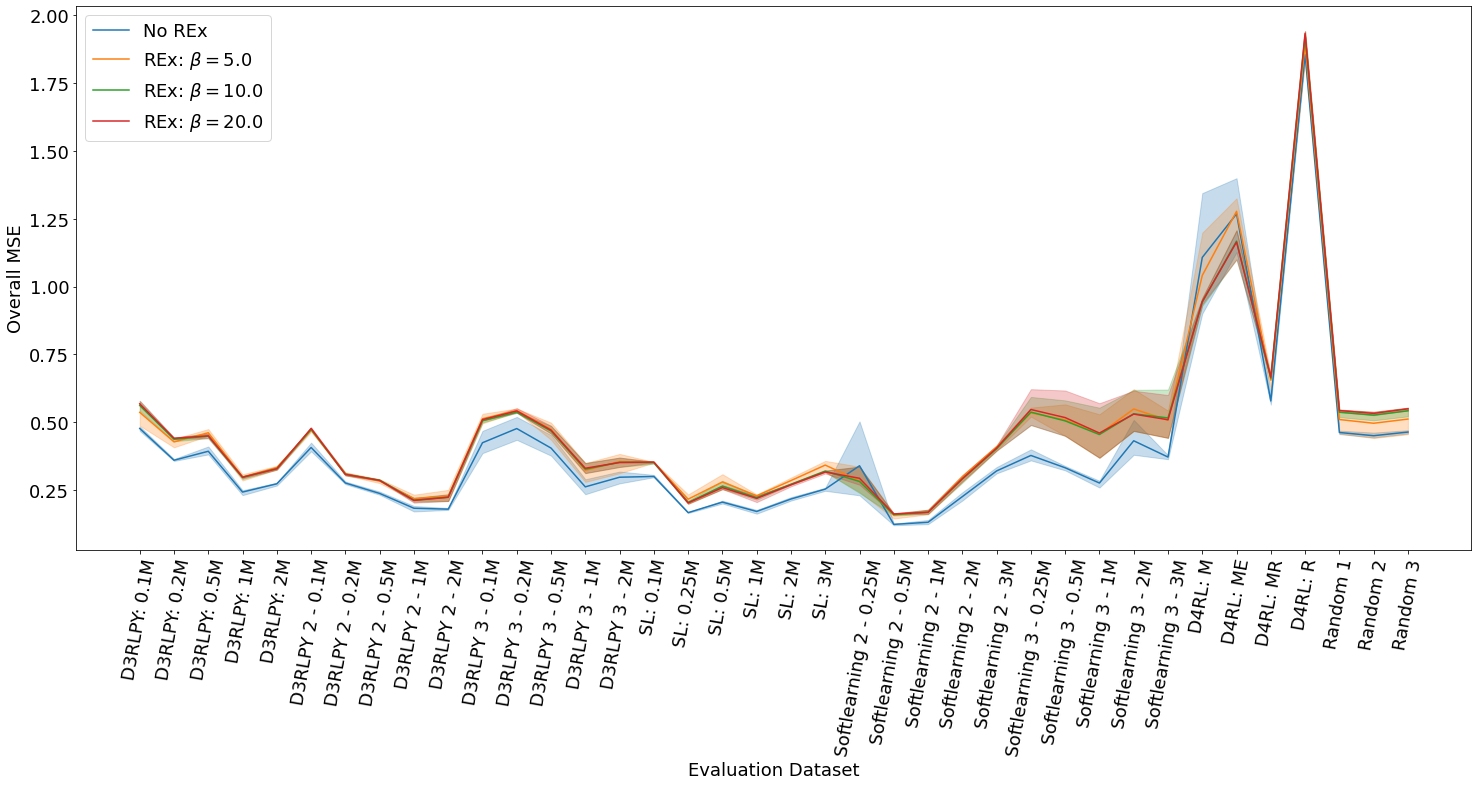

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))

metric = 'overall_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_rex_5_avgs_df, scores_rex_5_mins_df, scores_rex_5_maxs_df), 
    (scores_rex_10_avgs_df, scores_rex_10_mins_df, scores_rex_10_maxs_df), 
    (scores_rex_20_avgs_df, scores_rex_20_mins_df, scores_rex_20_maxs_df), 
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

# for i in training_datasets:
#     ax.axvline(i, ls='--', color='r')

ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Overall MSE')
ax.legend()

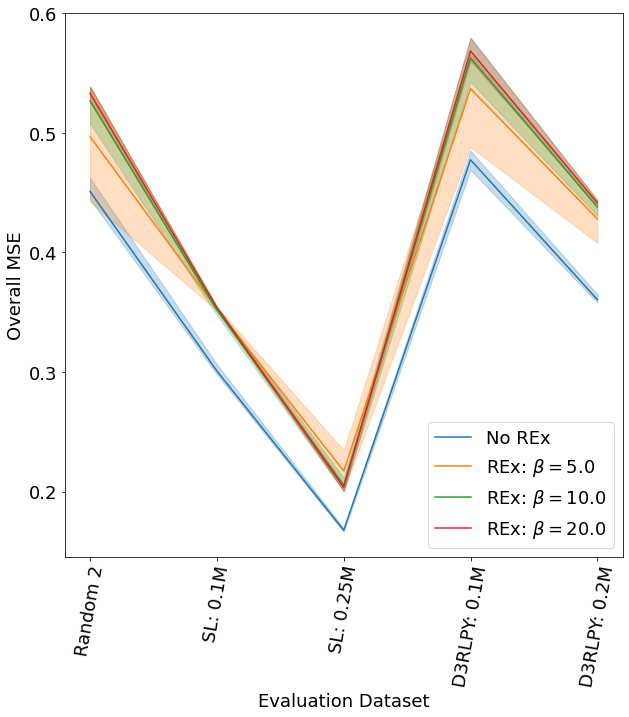

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

metric = 'overall_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_rex_5_avgs_df, scores_rex_5_mins_df, scores_rex_5_maxs_df), 
    (scores_rex_10_avgs_df, scores_rex_10_mins_df, scores_rex_10_maxs_df), 
    (scores_rex_20_avgs_df, scores_rex_20_mins_df, scores_rex_20_maxs_df), 
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[training_datasets][metric]
    ax.plot(training_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(training_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

ax.set_xticks(ax.get_xticks(), training_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Overall MSE')
ax.legend()

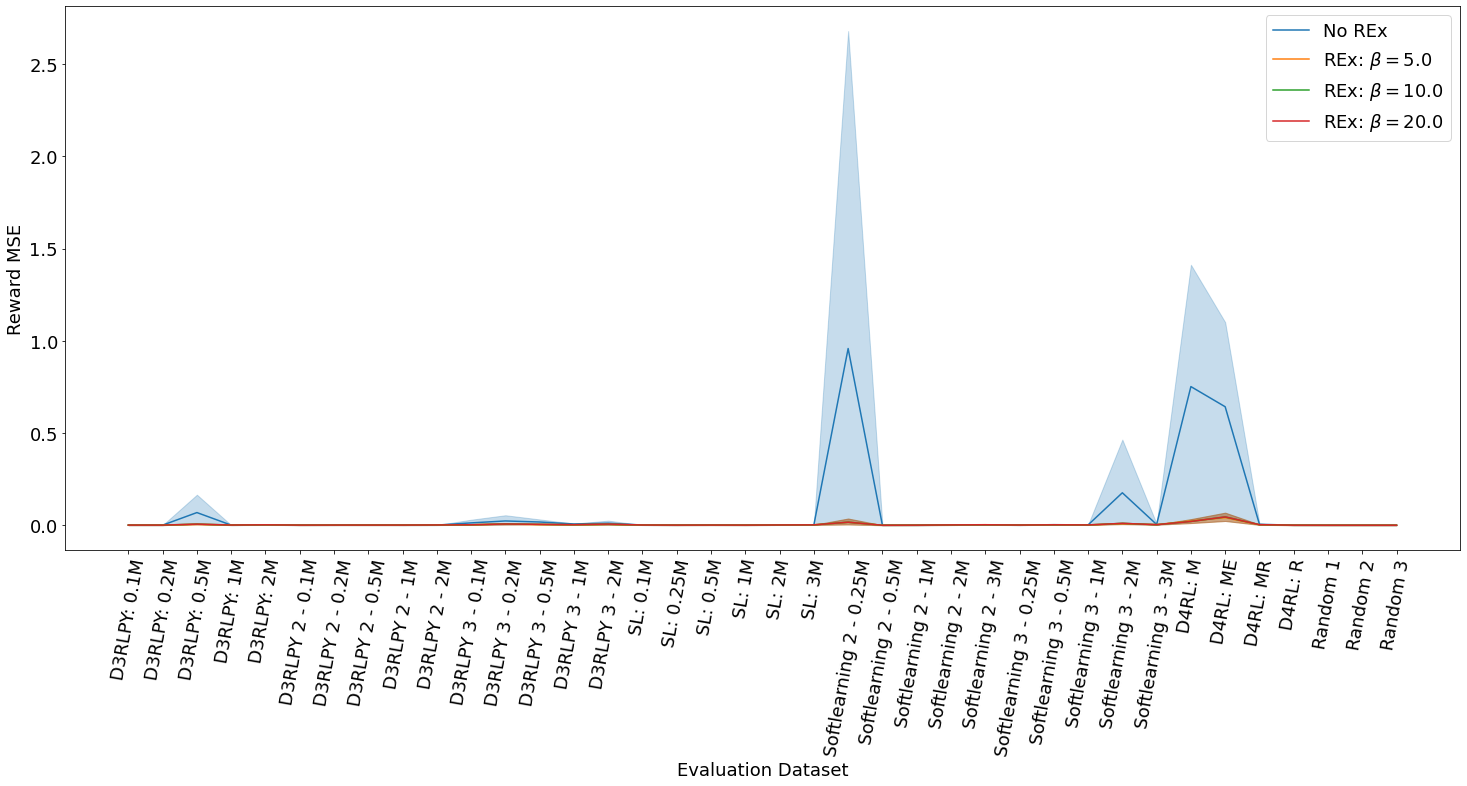

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))

metric = 'reward_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_rex_5_avgs_df, scores_rex_5_mins_df, scores_rex_5_maxs_df), 
    (scores_rex_10_avgs_df, scores_rex_10_mins_df, scores_rex_10_maxs_df), 
    (scores_rex_20_avgs_df, scores_rex_20_mins_df, scores_rex_20_maxs_df), 
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

# for i in training_datasets:
#     ax.axvline(i, ls='--', color='r')

ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Reward MSE')
ax.legend()

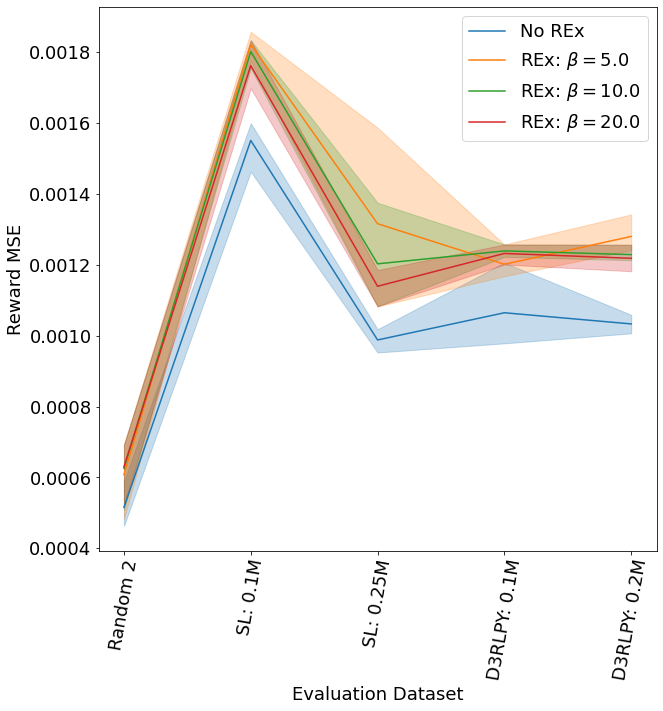

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

metric = 'reward_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_rex_5_avgs_df, scores_rex_5_mins_df, scores_rex_5_maxs_df), 
    (scores_rex_10_avgs_df, scores_rex_10_mins_df, scores_rex_10_maxs_df), 
    (scores_rex_20_avgs_df, scores_rex_20_mins_df, scores_rex_20_maxs_df), 
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[training_datasets][metric]
    ax.plot(training_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(training_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

ax.set_xticks(ax.get_xticks(), training_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Reward MSE')
ax.legend()

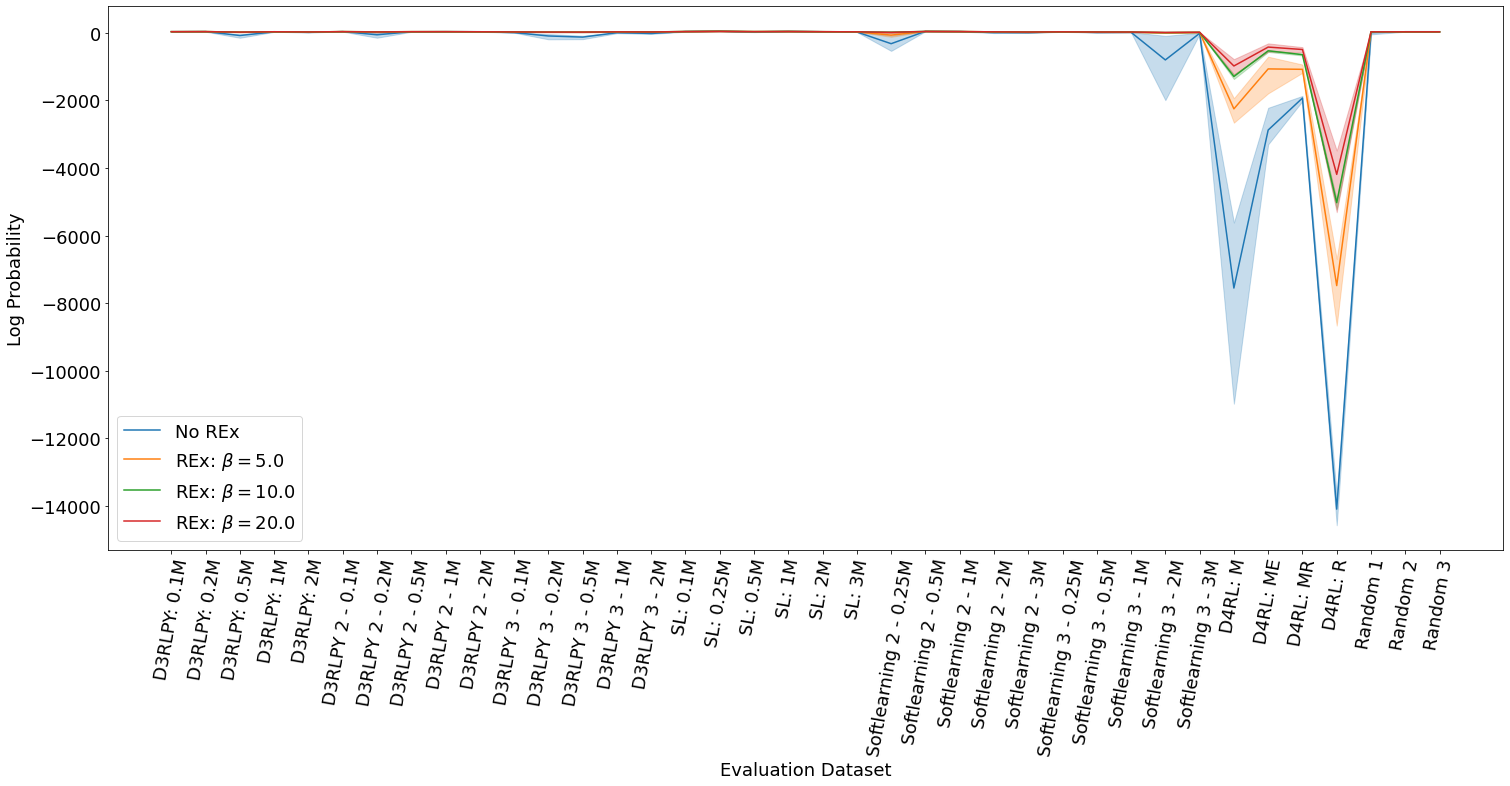

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_rex_5_avgs_df, scores_rex_5_mins_df, scores_rex_5_maxs_df), 
    (scores_rex_10_avgs_df, scores_rex_10_mins_df, scores_rex_10_maxs_df), 
    (scores_rex_20_avgs_df, scores_rex_20_mins_df, scores_rex_20_maxs_df), 
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

# for i in training_datasets:
#     ax.axvline(i, ls='--', color='r')

ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.legend()

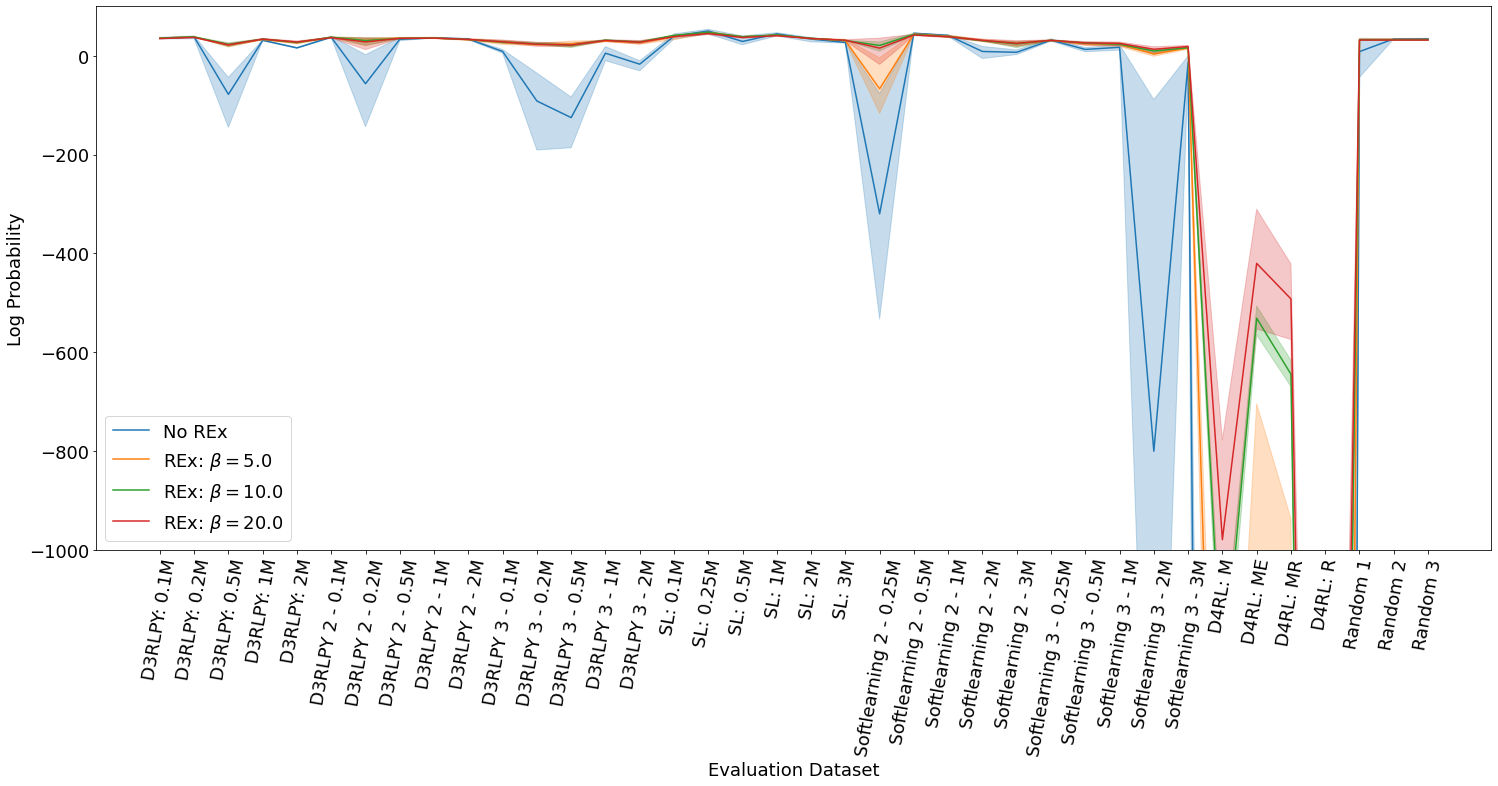

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_rex_5_avgs_df, scores_rex_5_mins_df, scores_rex_5_maxs_df), 
    (scores_rex_10_avgs_df, scores_rex_10_mins_df, scores_rex_10_maxs_df), 
    (scores_rex_20_avgs_df, scores_rex_20_mins_df, scores_rex_20_maxs_df), 
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

# for i in training_datasets:
#     ax.axvline(i, ls='--', color='r')

ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.set_ylim(-1000,100)
ax.legend()

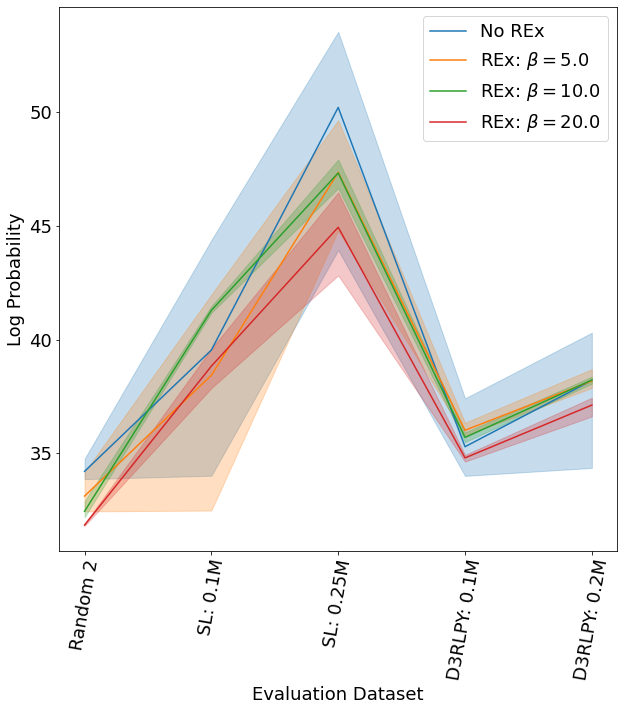

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_no_rex_avgs_df, scores_no_rex_mins_df, scores_no_rex_maxs_df),
    (scores_rex_5_avgs_df, scores_rex_5_mins_df, scores_rex_5_maxs_df), 
    (scores_rex_10_avgs_df, scores_rex_10_mins_df, scores_rex_10_maxs_df), 
    (scores_rex_20_avgs_df, scores_rex_20_mins_df, scores_rex_20_maxs_df), 
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[training_datasets][metric]
    ax.plot(training_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(training_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

# for i in training_datasets:
#     ax.axvline(i, ls='--', color='r')

ax.set_xticks(ax.get_xticks(), training_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.legend()